/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_17060/3346159034.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data, fontsize=10, color='white', rotation=45)


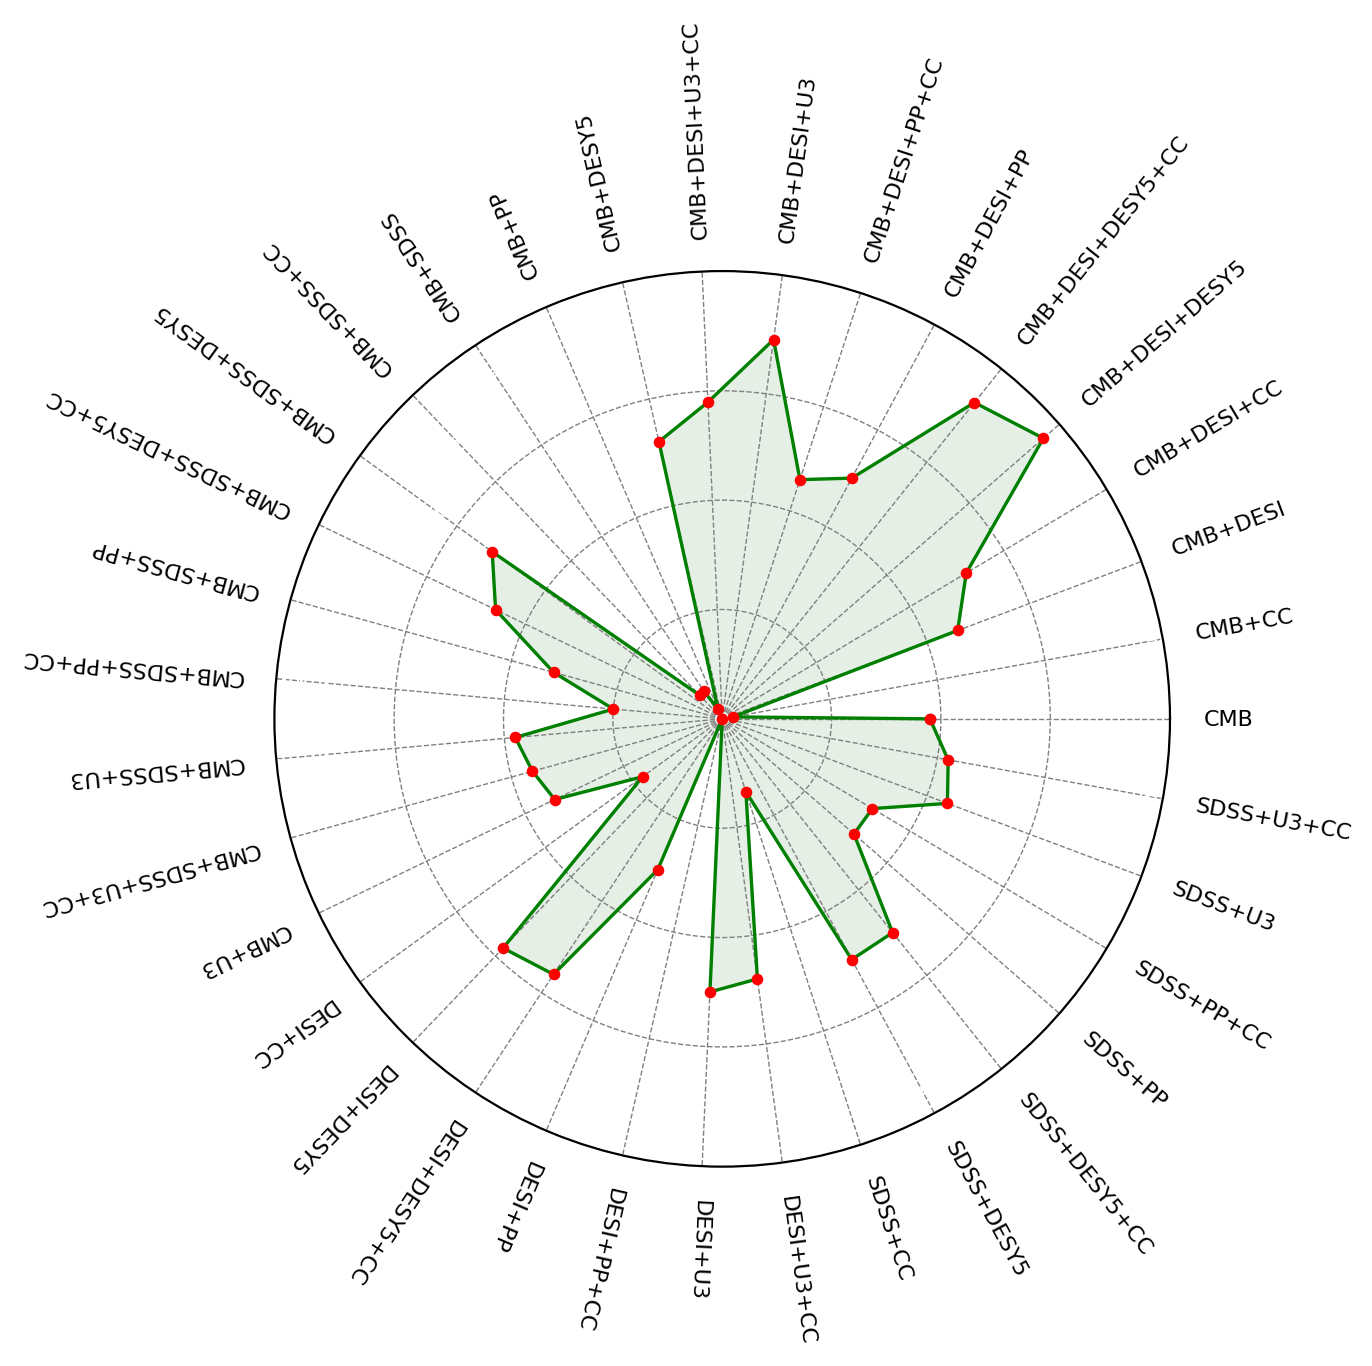

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = [
    "CMB", "CMB+CC", "CMB+DESI", "CMB+DESI+CC", "CMB+DESI+DESY5", "CMB+DESI+DESY5+CC",
    "CMB+DESI+PP", "CMB+DESI+PP+CC", "CMB+DESI+U3", "CMB+DESI+U3+CC", "CMB+DESY5",
    "CMB+PP", "CMB+SDSS", "CMB+SDSS+CC", "CMB+SDSS+DESY5", "CMB+SDSS+DESY5+CC",
    "CMB+SDSS+PP", "CMB+SDSS+PP+CC", "CMB+SDSS+U3", "CMB+SDSS+U3+CC", "CMB+U3",
    "DESI+CC", "DESI+DESY5", "DESI+DESY5+CC", "DESI+PP", "DESI+PP+CC", "DESI+U3",
    "DESI+U3+CC", "SDSS+CC", "SDSS+DESY5", "SDSS+DESY5+CC", "SDSS+PP", "SDSS+PP+CC",
    "SDSS+U3", "SDSS+U3+CC"
]

sigma = [
    1.9, 0.1, 2.3, 2.6, 3.9, 3.7, 2.5, 2.3, 3.5, 2.9, 2.6, 0.1, 0.3,
    0.3, 2.6, 2.3, 1.6, 1., 1.9, 1.8, 1.7, 0.9, 2.9, 2.8, 1.5, 0.,
    2.5, 2.4, 0.7, 2.5, 2.5, 1.6, 1.6, 2.2, 2.1
]

# Number of variables
num_vars = len(data)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Ensure the plot closes

# Add the first value to sigma to close the radar chart
sigma += sigma[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Plot the data
ax.fill(angles, sigma, color='Darkgreen', alpha=0.1)
ax.plot(angles, sigma, color='green', linewidth=1.2)

# Customize the grid
ax.grid(color='gray', linestyle='dotted', linewidth=0.5)
ax.set_yticks(range(1, int(max(sigma)) + 1))
#ax.set_yticklabels(map(str, range(0, int(max(sigma)) + 1)), color="k", fontsize=8)
ax.set_yticklabels([])

# Customize the labels
ax.set_xticklabels(data, fontsize=10, color='white', rotation=45)

for angle, label in zip(angles[:-1], data):
    x, y = np.cos(angle), np.sin(angle)
    #alignment = 'right' if x < 0 else 'left'
    ax.text(
        angle, max(sigma) + 0.5, label,
        fontsize=8, ha='left', va='center',
        rotation=np.degrees(angle), rotation_mode='anchor'
    )

ax.scatter(angles, sigma, color='red', marker='o', s=10, zorder=10)

# Adjust grid lines to correspond to the x-axis points
ax.set_xticks(angles[:-1])  # Set the x-ticks to the angles of the data points
ax.grid(color='grey', linestyle='--', linewidth=0.5)  # Red grid lines corresponding to the points

# Adjust layout for clarity
plt.tight_layout()
#plt.show()
plt.savefig('sigmas.pdf')